# IPL DATA ANALYSIS

## Project Overview

### This project performs an end-to-end Exploratory Data Analysis (EDA) on the IPL Matches dataset (Matches.csv). It uncovers team- and player-level trends, analyzes toss behavior and strategic decisions, quantifies margin-of-victory patterns (defend vs chase), and visualizes head-to-head performance across seasons. The analysis highlights consistent top performers, identifies strategic advantages and vulnerabilities for teams, and surfaces actionable insights for sports analytics.

### The goal was to understand patterns in IPL outcomes and identify factors contributing to team success.
###

In [4]:
#Loading requierd libraries for data processing and visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
#loading Data Set
ipl = pd.read_csv(r"D:\2025LocalDisk D\Personal 2025\Personal Training\Python Portfolio Project\IPL_Data_Analysis\Matches.csv")
#To verify records have been loaded here, we will see first 5 records from the Data Set
ipl.head()

,id,city,Seasons,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,Bangalore,IPL - 2008,18-04-2008,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,IPL - 2008,19-04-2008,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,IPL - 2008,19-04-2008,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,IPL - 2008,20-04-2008,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,IPL - 2008,20-04-2008,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [11]:
#Loading the dimensions of the table
ipl.shape
#It has 1096 Rows and 20 Columns

(1096, 20)

In [12]:
#Identifying how many null values does each column have
ipl.isnull().sum()

id                    0
city                 52
Seasons               1
date                  1
match_type            1
player_of_match       6
venue                 1
team1                 1
team2                 1
toss_winner           1
toss_decision         1
winner                6
result                1
result_margin        20
target_runs           4
target_overs          4
super_over            1
method             1075
umpire1               1
umpire2               0
dtype: int64

In [19]:
#From above we see that "method" column has no values in it and is of no use, thus dropping it permanently
ipl.drop("method",axis = 1, inplace=True)
ipl.head()

,id,city,Seasons,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2
0,335982,Bangalore,IPL - 2008,18-04-2008,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen
1,335983,Chandigarh,IPL - 2008,19-04-2008,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,MR Benson,SL Shastri
2,335984,Delhi,IPL - 2008,19-04-2008,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,IPL - 2008,20-04-2008,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,SJ Davis,DJ Harper
4,335986,Kolkata,IPL - 2008,20-04-2008,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,BF Bowden,K Hariharan


In [25]:
#Drawing insights on most wins as "Player of The Match" - Top 10
ipl["player_of_match"].value_counts()[0:10]
#We get to see AB de Villiers has been the winner of "Player of The Match" title most times!

player_of_match
AB de Villiers    25
CH Gayle          22
RG Sharma         19
V Kohli           18
DA Warner         18
MS Dhoni          17
YK Pathan         16
RA Jadeja         16
SR Watson         16
AD Russell        15
Name: count, dtype: int64

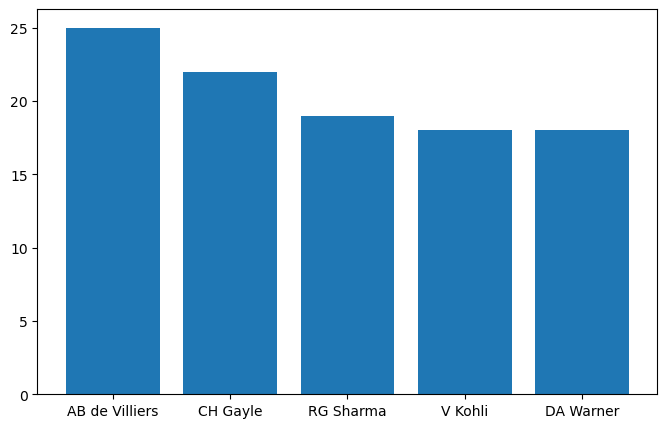

In [32]:
Top5 = ipl["player_of_match"].value_counts()[0:5]
x = list(Top5.index)
y = list(Top5.values)
plt.figure(figsize=(8,5))
plt.bar(x,y)
plt.show()

In [133]:
#To Find out of all the teams which was the team that won the toss most of the times
toss_wins = ipl["toss_winner"].value_counts()
toss_wins
# We can see that the most of the toss were won by - Mumbai Indians, followed by Kolkata Knight Riders and Chennai SUper Kings.

toss_winner
Mumbai Indians                 143
Kolkata Knight Riders          122
Chennai Super Kings            122
Rajasthan Royals               120
Royal Challengers Bangalore    113
Sunrisers Hyderabad             88
Kings XI Punjab                 85
Delhi Daredevils                80
Delhi Capitals                  50
Deccan Chargers                 43
Punjab Kings                    24
Gujarat Titans                  22
Pune Warriors                   20
Lucknow Super Giants            19
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Royal Challengers Bengaluru      8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: count, dtype: int64

In [77]:
#To extract the records where a team won batting first or balling first
result = ipl["result"].value_counts()
#Here "runs" means team which won batting first
#"wickets" mean team which won fielding first
result

result
wickets      578
runs         498
tie           14
no result      5
Name: count, dtype: int64

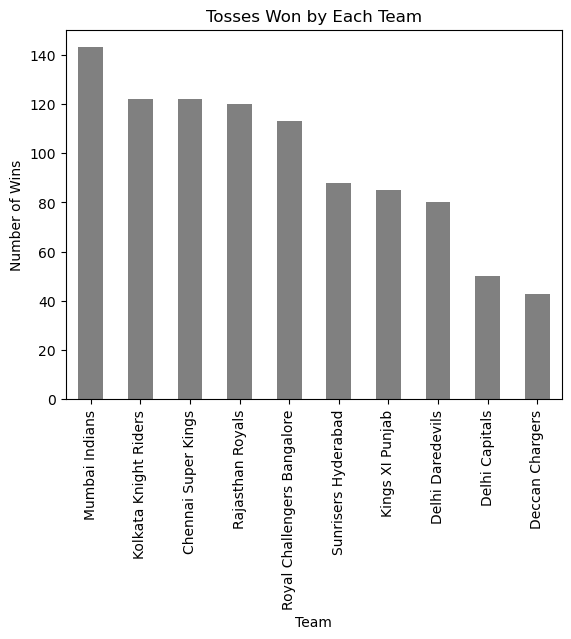

In [136]:
#Bar Chart visualization to see who won the Tosses most of the times!
toss_wins.head(10).plot.bar(color="grey")
plt.xlabel("Team")
plt.ylabel("Number of Wins")
plt.title("Tosses Won by Each Team")
plt.show()

In [78]:
#Extracting number of times the team which won by batting first
batting_first = result.get("runs", 0)
#Extracting number of times the team which won by fielding first
fielding_first = result.get("wickets", 0)
print("Number of times the team won when they chose Batting First  : ",batting_first)
print("Number of times the team won when they chose Fielding First  : ",fielding_first)

Number of times the team won when they chose Batting First  :  498
Number of times the team won when they chose Fielding First  :  578


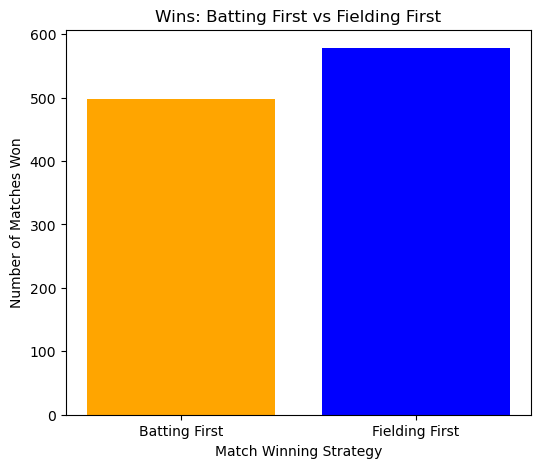

In [93]:
# Creating a bar chart to analyze the winning strategy
x = ["Batting First", "Fielding First"]
y = [batting_first, fielding_first]
#creating the bar graph
plt.figure(figsize=(6, 5))

# bar chart
plt.bar(x, y, color=["orange", "blue"])
plt.title("Wins: Batting First vs Fielding First")
plt.xlabel("Match Winning Strategy")
plt.ylabel("Number of Matches Won")
plt.show()

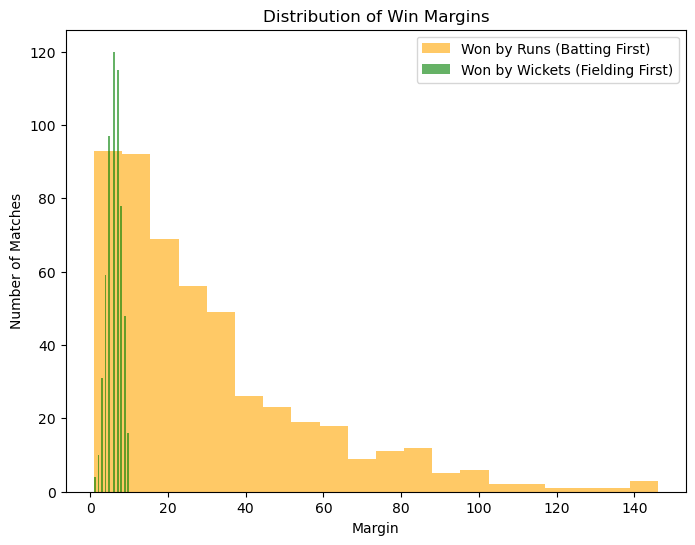

In [102]:
# Filter the data for batting and fielding wins
batting_wins = ipl[ipl["result"] == "runs"]["result_margin"]
fielding_wins = ipl[ipl["result"] == "wickets"]["result_margin"]

# Making sure result_margin is numeric
batting_wins = batting_wins.astype(int)
fielding_wins = fielding_wins.astype(int)


#Histogram visualization to see distribution of win margins, for those who bat first vs. field first!
plt.figure(figsize=(8, 6))
plt.hist(batting_wins, bins=20, alpha=0.6, label='Won by Runs (Batting First)', color='orange')
plt.hist(fielding_wins, bins=20, alpha=0.6, label='Won by Wickets (Fielding First)', color='green')
plt.title("Distribution of Win Margins")
plt.xlabel("Margin")
plt.ylabel("Number of Matches")
plt.legend()
plt.show()

In [120]:
#Extracting the team which won the title most of the times
Winner = ipl["winner"].value_counts()
Winner

winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bangalore    116
Rajasthan Royals               112
Sunrisers Hyderabad             88
Kings XI Punjab                 88
Delhi Daredevils                67
Delhi Capitals                  48
Deccan Chargers                 29
Gujarat Titans                  28
Punjab Kings                    24
Lucknow Super Giants            24
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Royal Challengers Bengaluru      7
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64

In [140]:
#Extracting top 5 teams from this
Top10 = Winner.sort_values(ascending=False).head(10)
Top10

winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bangalore    116
Rajasthan Royals               112
Sunrisers Hyderabad             88
Kings XI Punjab                 88
Delhi Daredevils                67
Delhi Capitals                  48
Deccan Chargers                 29
Name: count, dtype: int64

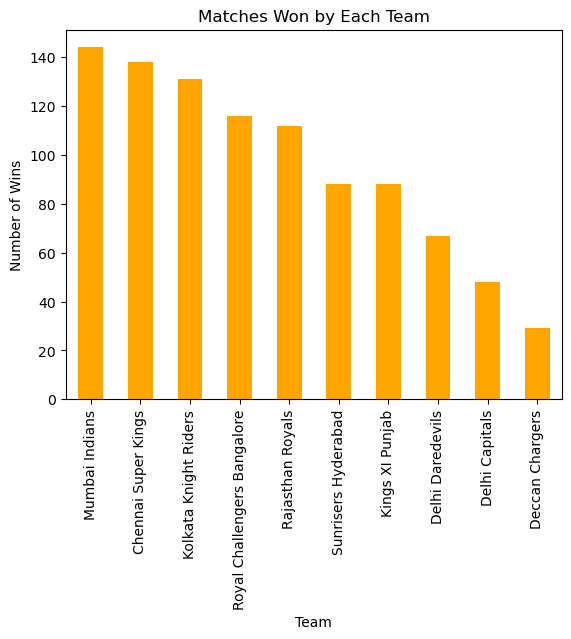

In [132]:
#Bar Chart visualization to see who won the title cup most of the times!
Top10.plot.bar(color="orange")
plt.xlabel("Team")
plt.ylabel("Number of Wins")
plt.title("Matches Won by Each Team")
plt.show()

#

### Key Insights & Learnings

#### * AB de Villiers emerged as the most impactful player based on Player of the Match awards.

#### * Mumbai Indians consistently dominated tosses, giving them a strategic edge.

#### * Toss may not directly determine victory, but it shapes team strategy significantly.

### Match-winning strategy :

#### ** Batting first often leads to winnig with good margin runs.

#### ** Fielding first usually results in wins.
# 

In [124]:
#Extracting the list of Seasons, with how many matches played in them!
MatchCount = ipl["Seasons"].value_counts()
MatchCount

Seasons
IPL - 2013    76
IPL - 2022    74
IPL - 2012    74
IPL - 2023    74
IPL - 2011    73
IPL - 2024    71
IPL - 2019    60
IPL - 2016    60
IPL - 2010    60
IPL - 2021    60
IPL - 2020    60
IPL - 2014    60
IPL - 2018    60
IPL - 2017    59
IPL - 2015    59
IPL - 2008    58
IPL - 2009    57
Name: count, dtype: int64

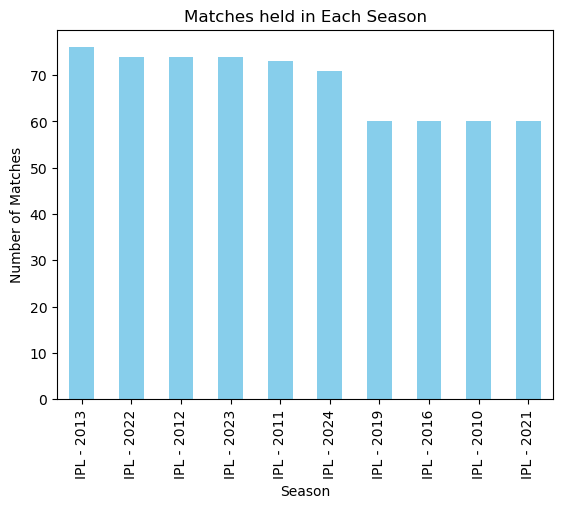

In [129]:
#Bar Chart visualization to see Number of matches played each Season - Top 10!
MatchCount.head(10).plot.bar(color="skyblue")
plt.xlabel("Season")
plt.ylabel("Number of Matches")
plt.title("Matches held in Each Season")
plt.show()

In [126]:
#Extracting the list of cities, with how many matches played in them!
CityCount = ipl["city"].value_counts()
CityCount

city
Mumbai            173
Kolkata            93
Delhi              90
Chennai            85
Hyderabad          77
Bangalore          65
Chandigarh         61
Jaipur             57
Pune               51
Abu Dhabi          37
Ahmedabad          36
Bengaluru          29
Visakhapatnam      15
Durban             15
Lucknow            14
Dubai              13
Dharamsala         13
Centurion          12
Rajkot             10
Sharjah            10
Navi Mumbai         9
Indore              9
Johannesburg        8
Ranchi              7
Cuttack             7
Cape Town           7
Port Elizabeth      7
Raipur              6
Kochi               5
Mohali              5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Guwahati            3
Bloemfontein        2
Name: count, dtype: int64

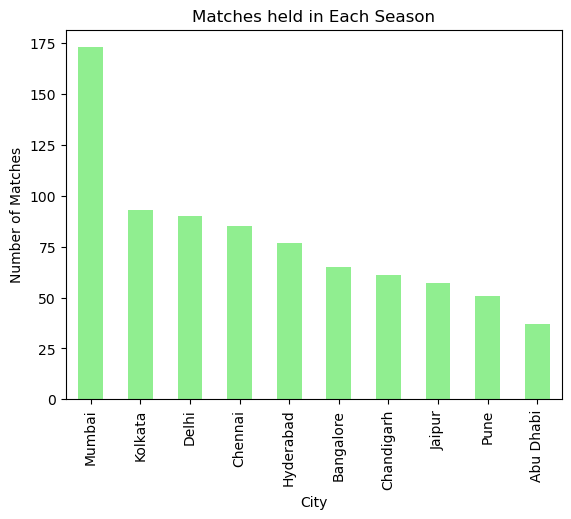

In [130]:
#Bar Chart visualization to see Number of matches played in each City - Top 10!
CityCount.head(10).plot.bar(color="lightgreen")
plt.xlabel("City")
plt.ylabel("Number of Matches")
plt.title("Matches held in Each Season")
plt.show()